In [6]:
import numpy as np
from matplotlib import pyplot as plt
from collections import deque
%matplotlib notebook

In [24]:
def trim_begin_ending(data):
    begin_idx = np.min([np.argmax(data[:,1]>0),np.argmax(data[:,2]>0)])
    last_idx = len(data)-np.min([np.argmax(data[::-1,1]>0),np.argmax(data[::-1,2]>0)])
    data = data[begin_idx:last_idx]
    return data

def moving_median(X, window=9, avg_func=np.median):
    buffer = deque(maxlen=window)
    ret = []
    for x in X:
        buffer.append(x)
        ret.append(avg_func(buffer))
    return np.array(ret)

def add_removed_vals(data, ts_min_diff = 100):
    ret = []
    last_ts = data[0,0]
    for k, d in enumerate(data):
        if k == 0:
            continue
        last_d = data[k-1]
        last_ts = last_d[0]
        
        if d[0] - last_ts > ts_min_diff:
            add_cnt = int((d[0] - last_ts)/ts_min_diff)
        else:
            add_cnt = 1
        for i in range(add_cnt):
            ret.append([last_ts+i*ts_min_diff, last_d[1], last_d[2]])
    ret.append(data[-1])
    return np.array(ret)
        
def remove_outlier(data, min_outlier=400):
    data = data[data[:,1] <= min_outlier]
    data = data[data[:,2] <= min_outlier]
    return data
    
    
def plot_file(filename):
    data = np.loadtxt(open("../../wheelknife-data/"+filename, "rb"), delimiter=",", skiprows=1)
    data = data[:,:3]
    data = remove_outlier(data)
    #data = trim_begin_ending(data)
    #data = add_removed_vals(data)
    x = data[:,0]
    front = data[:,1]
    back = data[:,2]
    #front = moving_median(data[:,1])
    #back = moving_median(data[:,2])
    
    plt.figure(figsize=(9,3))
    plt.title(filename)
    plt.plot(x, front, c="purple")
    plt.plot(x, back, c="red")
    plt.show()
    return data

<IPython.core.display.Javascript object>


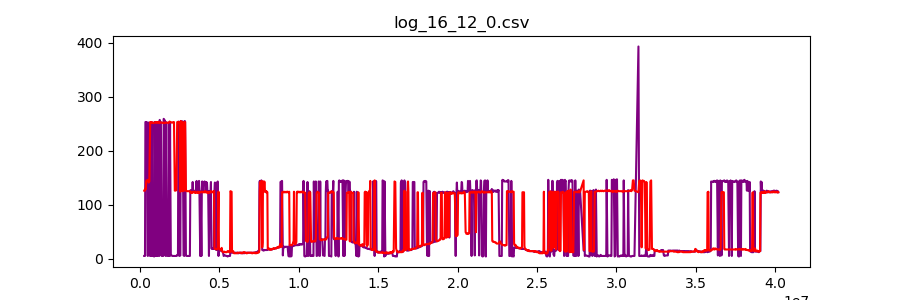

In [25]:
bla = plot_file("log_16_12_0.csv")

<IPython.core.display.Javascript object>


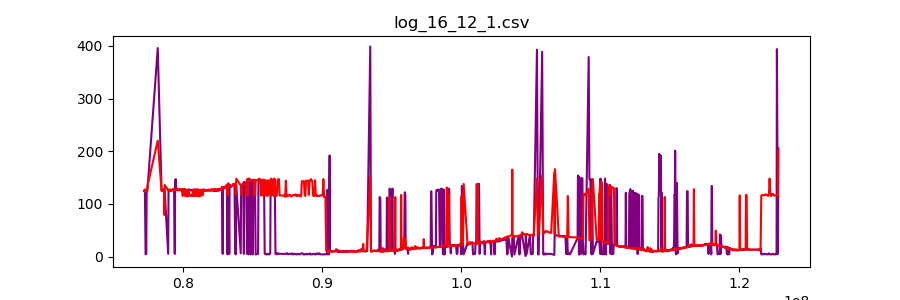

array([[7.71765920e+07, 1.25000000e+02, 1.24000000e+02],
       [7.72015920e+07, 1.26000000e+02, 1.25000000e+02],
       [7.72265920e+07, 1.27000000e+02, 1.27000000e+02],
       ...,
       [1.22726591e+08, 3.94000000e+02, 1.16000000e+02],
       [1.22801591e+08, 5.00000000e+00, 1.15000000e+02],
       [1.22826591e+08, 2.05000000e+02, 2.02000000e+02]])

In [26]:
plot_file("log_16_12_1.csv")

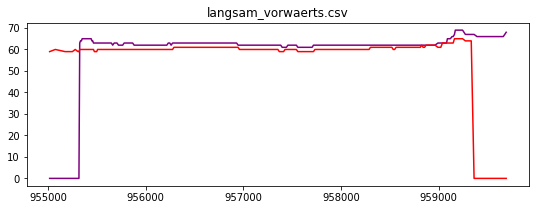

array([[9.55016e+05, 0.00000e+00, 5.90000e+01],
       [9.55045e+05, 0.00000e+00, 6.00000e+01],
       [9.55074e+05, 0.00000e+00, 6.00000e+01],
       [9.55124e+05, 0.00000e+00, 0.00000e+00],
       [9.55174e+05, 0.00000e+00, 0.00000e+00],
       [9.55182e+05, 6.40000e+01, 5.90000e+01],
       [9.55191e+05, 6.30000e+01, 6.00000e+01],
       [9.55220e+05, 6.40000e+01, 0.00000e+00],
       [9.55249e+05, 0.00000e+00, 6.10000e+01],
       [9.55278e+05, 0.00000e+00, 6.00000e+01],
       [9.55307e+05, 0.00000e+00, 5.90000e+01],
       [9.55316e+05, 6.50000e+01, 6.00000e+01],
       [9.55324e+05, 6.50000e+01, 6.00000e+01],
       [9.55332e+05, 6.50000e+01, 6.00000e+01],
       [9.55341e+05, 6.50000e+01, 6.00000e+01],
       [9.55349e+05, 6.50000e+01, 6.00000e+01],
       [9.55358e+05, 6.50000e+01, 6.00000e+01],
       [9.55387e+05, 0.00000e+00, 6.00000e+01],
       [9.55416e+05, 0.00000e+00, 6.00000e+01],
       [9.55424e+05, 6.60000e+01, 6.00000e+01],
       [9.55432e+05, 6.40000e+01, 5.9000

In [3]:
plot_file("langsam_vorwaerts.csv")

<IPython.core.display.Javascript object>


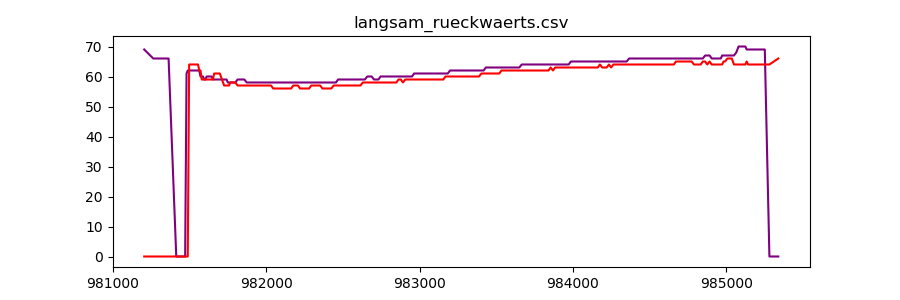

In [54]:
plot_file("langsam_rueckwaerts.csv")

<IPython.core.display.Javascript object>


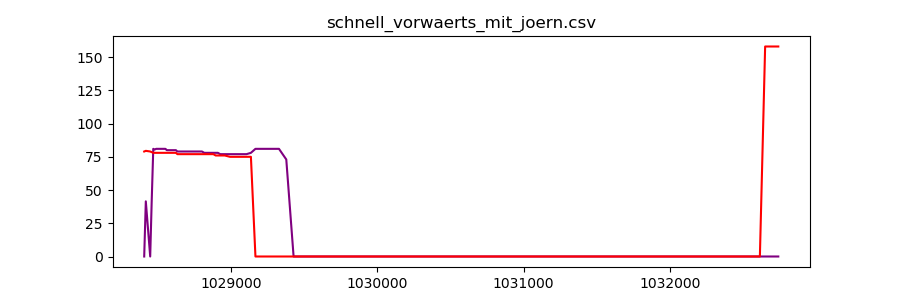

array([[1.028405e+06, 0.000000e+00, 7.900000e+01],
       [1.028416e+06, 8.300000e+01, 8.000000e+01],
       [1.028446e+06, 0.000000e+00, 7.800000e+01],
       [1.028456e+06, 8.100000e+01, 7.800000e+01],
       [1.028467e+06, 8.100000e+01, 7.800000e+01],
       [1.028477e+06, 8.000000e+01, 7.800000e+01],
       [1.028487e+06, 8.200000e+01, 7.800000e+01],
       [1.028498e+06, 8.200000e+01, 7.800000e+01],
       [1.028508e+06, 8.200000e+01, 7.800000e+01],
       [1.028519e+06, 8.000000e+01, 7.800000e+01],
       [1.028529e+06, 8.000000e+01, 7.800000e+01],
       [1.028539e+06, 8.000000e+01, 7.900000e+01],
       [1.028550e+06, 8.100000e+01, 7.800000e+01],
       [1.028560e+06, 8.000000e+01, 7.800000e+01],
       [1.028570e+06, 8.000000e+01, 7.800000e+01],
       [1.028581e+06, 8.000000e+01, 7.800000e+01],
       [1.028591e+06, 7.900000e+01, 7.700000e+01],
       [1.028601e+06, 7.900000e+01, 7.700000e+01],
       [1.028612e+06, 7.900000e+01, 7.700000e+01],
       [1.028622e+06, 7.900000e

In [82]:
plot_file("schnell_vorwaerts_mit_joern.csv")

<IPython.core.display.Javascript object>


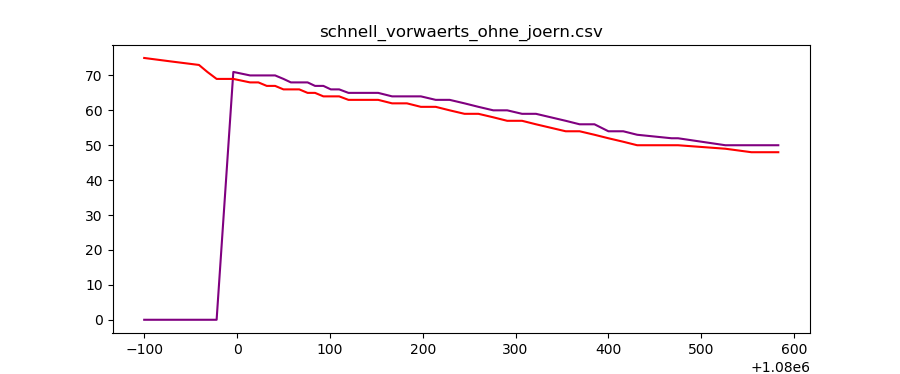

In [85]:
schnell_vorwaerts = plot_file("schnell_vorwaerts_ohne_joern.csv")

In [107]:
8.3/40*10

2.075

In [109]:
70/3600*1000

19.444444444444446

In [115]:
20*0.125

2.5

In [117]:
20*0.1

2.0

In [104]:
ts = schnell_vorwaerts[:,0]
x_front = schnell_vorwaerts[:,1]
x_back = schnell_vorwaerts[:,2]
ts_diff = ts[np.argmax(x_front>0)]-ts[0] # milliseconds
print("ts_diff", ts_diff)
sensor_length = 8.3 * 100 # meter
v_diff = sensor_length/ts_diff # meter / milliseconds
#v_diff/1000
time_overtake = ts[-1]-ts[0]
print(time_overtake)
time_overtake*v_diff

ts_diff 68.0
683.0


8336.617647058823

<IPython.core.display.Javascript object>


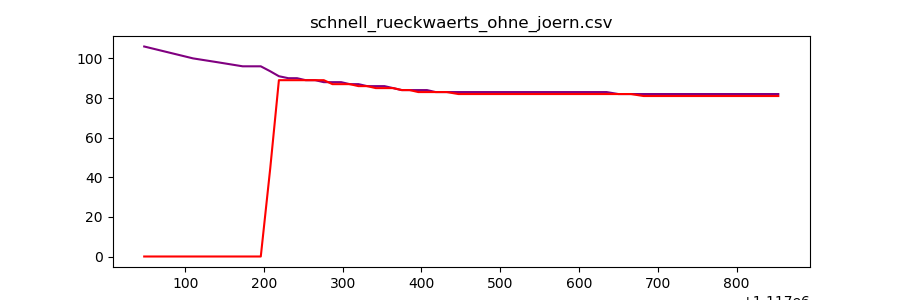

In [74]:
plot_file("schnell_rueckwaerts_ohne_joern.csv")

<IPython.core.display.Javascript object>


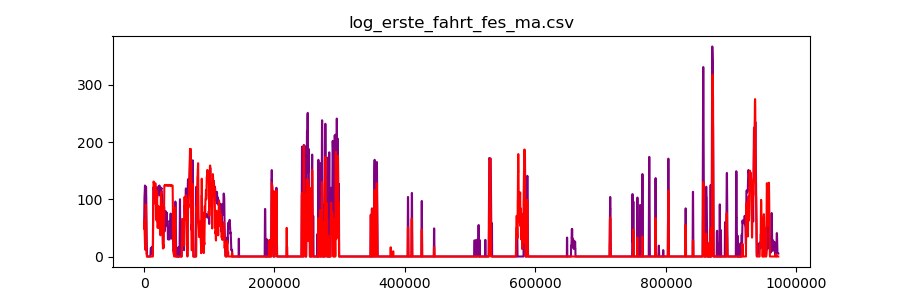

In [65]:
plot_file("log_erste_fahrt_fes_ma.csv")

<IPython.core.display.Javascript object>


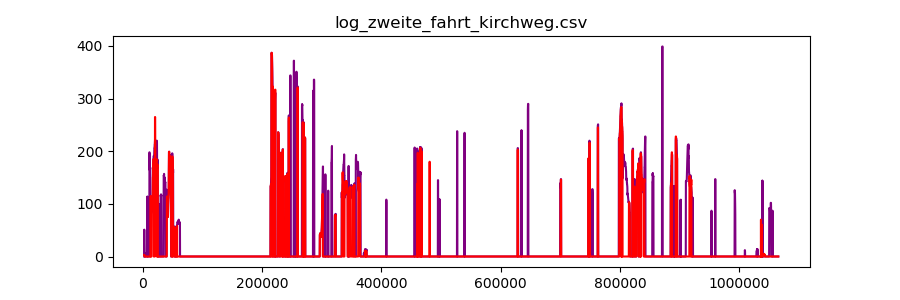

array([[2.649000e+03, 0.000000e+00, 3.000000e+00],
       [2.713000e+03, 5.200000e+01, 3.000000e+00],
       [2.777000e+03, 5.100000e+01, 3.000000e+00],
       ...,
       [1.064823e+06, 7.000000e+00, 0.000000e+00],
       [1.064927e+06, 6.000000e+00, 0.000000e+00],
       [1.065031e+06, 7.000000e+00, 0.000000e+00]])

In [118]:
plot_file("log_zweite_fahrt_kirchweg.csv")